# Name: Nguyen Quoc Minh Quan
# Student ID: 13740328
# James Cook University Singapore
# Lecturer: Shailey Chawla

In [10]:
# Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns

In [23]:
import matplotlib.pyplot as plt
from collections import deque
import pandas as pd
import numpy as np
%matplotlib inline

# Set multiple theme parameters in one step.
# Each set of parameters can be set directly or temporarily, see the referenced functions below for more information.
# color_codes: bool
# If True and palette is a seaborn palette, remap the shorthand color codes (e.g. “b”, “g”, “r”, etc.) to the colors from this palette.
sns.set(color_codes=True)

# Data scanning, Data cleaning and basic understandings of the dataset

In [14]:
# Print the Dataset out
dataset = pd.read_csv("./AB_NYC_2019.csv")
dataset.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [15]:
# Display the number of null values can be found in each column 
dataset.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

There are 16 null name and 21 null host_name

In [16]:
# The codes below returns the dimension of the dataset which is a tuple (a,b) where a is the total number of row and b is the total number of column
dataset.shape

(48895, 16)

There are a total of 48895 rows, which means there are a total of 48895 host_id and host_name

In [17]:
# Find out the null percentage of name and host_name
print("Percentage of null name: ", 16/48895*100, "%")
print("Percentage of null name: ", 21/48895*100, "%")

Percentage of null name:  0.03272318232948154 %
Percentage of null name:  0.04294917680744453 %


The null percentage is much much lower than 0,1%, but they are vitals data to this research so we need to fill them up with some temp data in order for the research algorithms to work

In [18]:
# replace all null host_name with "No information provided"
dataset.host_name.fillna("No information provided", inplace = True)

In [19]:
# replace all null name with "No Name provided"
dataset.name.fillna("No Name provided" , inplace = True)

In [20]:
# Check for null again
dataset.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

last_review and reviews_per_month are variables that considered to be not much necessary toward this data research

In [21]:
# describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.
dataset.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [24]:
# print total unique neighbourhoods count
print ("Total Neighbourhoods:", len(np.unique(dataset.neighbourhood)))

Total Neighbourhoods: 221


In [25]:
# print total unique neighbourhood group
print ("Total Listing group:", len(np.unique(dataset.neighbourhood_group)))

Total Listing group: 5


We can see here that 221 neighbourhoods are part of 5 main major neighbourhood group

In [26]:
# Print the percentage of neighbourhood group and the total neighbourhoods count
print("% of neighbourhood group & the total neighbourhoods count: ", 5/221*100, "%")

% of neighbourhood group & the total neighbourhoods count:  2.262443438914027 %


In [27]:
# print total unique roomtype
print ("Total Listing room type:", len(np.unique(dataset.room_type)))

Total Listing room type: 3


In [28]:
# Print room type distribution
dataset['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

<AxesSubplot:ylabel='room_type'>

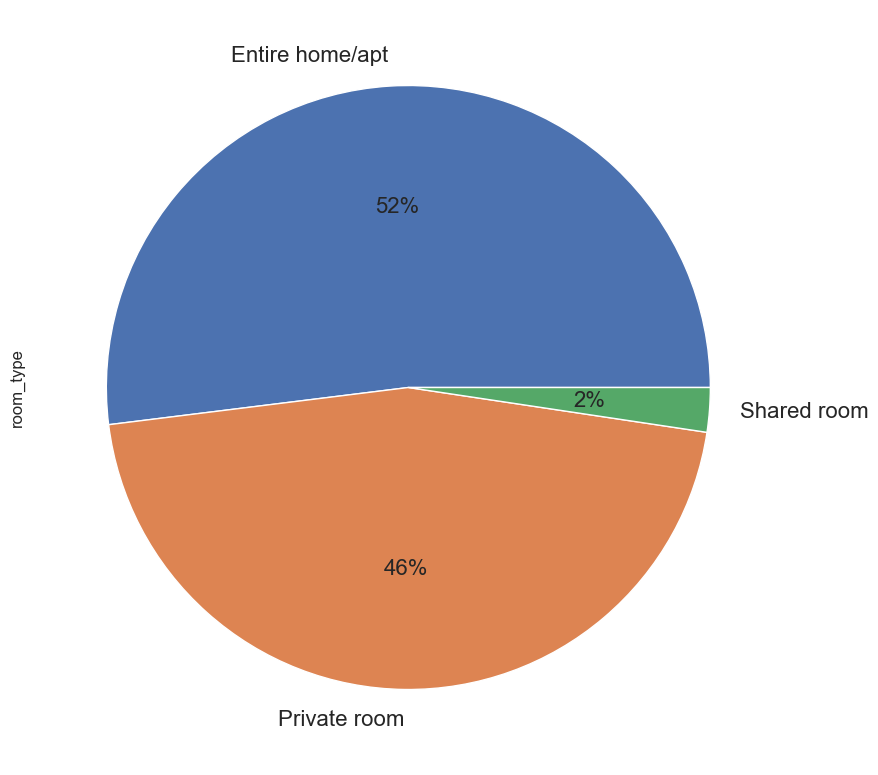

In [29]:
fig = plt.figure(figsize=(10,10), dpi=100)
dataset['room_type'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=16)

There are only three main room types in this dataset

# Use Hash Table to store id and name of airbnb host of the dataset


Because we have a huge dataset with 48895 rows and 16 column. And this data research project requires us to read and visualize multiple datas as once. Hash Table data structure comes in handy since they are very fast with the access time of an element is on average O(1). We can easily search for any host name with time complexity of O(1) with just the provided id

We will initiated the Hashtable and store our dataset inside it

In [30]:
# Initiate Hash Table class

class HashTable:
    def __init__(self, length):
       # Initiate our array with empty values.
        self.array = [None] * length
    
    def hash(self, key):
        """Get the index of our array for a specific string key"""
        length = len(self.array)
        return hash(key) % length
        
    def add(self, key, value):
        """Add a value to our array by its key"""
        index = self.hash(key)
        if self.array[index] is not None:
            # This index already contain some values.
            # This means that this add MIGHT be an update
            # to a key that already exist. Instead of just storing
            # the value we have to first look if the key exist.
            for kvp in self.array[index]:
                # If key is found, then update
                # its current value to the new value.
                if kvp[0] == key:
                    kvp[1] = value
                    break
            else:
                # If no breaks was hit in the for loop, it 
                # means that no existing key was found, 
                # so we can simply just add it to the end.
                self.array[index].append([key, value])
        else:
            # This index is empty. We should initiate 
            # a list and append our key-value-pair to it.
            self.array[index] = []
            self.array[index].append([key, value])
        if self.is_full():
            self.double()
    
    def get(self, key):
        """Get a value by key"""
        index = self.hash(key)
        if self.array[index] is None:
            return "No value can be found"
        else:
            # Loop through all key-value-pairs
            # and find if our key exist. If it does 
            # then return its value.
            for kvp in self.array[index]:
                if kvp[0] == key:
                    return kvp[1]
            
            # If no return was done during loop,
            # it means key didn't exist.
            return "No value can be found"
    def is_full(self):
        """Determines if the HashTable is too populated."""
        items = 0
        # Count how many indexes in our array
        # that is populated with values.
        for item in self.array:
            if item is not None:
                items += 1
        # Return bool value based on if the 
        # amount of populated items are more 
        # than half the length of the list.
        return items > len(self.array)/2
        
    def double(self):
        """Double the list length and re-add values"""
        ht2 = HashTable(length=len(self.array)*2)
        for i in range(len(self.array)):
            if self.array[i] is None:
                continue
            
            # Since our list is now a different length,
            # we need to re-add all of our values to 
            # the new list for its hash to return correct
            # index.
            for kvp in self.array[i]:
                ht2.add(kvp[0], kvp[1])
        
        # Finally we just replace our current list with 
        # the new list of values that we created in ht2.
        self.array = ht2.array
    def print_items(self):
        """Print Method for the class"""
        index = len(self.array)
        for kvp in range(index):
                return self.array[kvp]

As we can see earlier, we have a total of 5 main neighbourhood, we will spread the dataset into smaller subsets of 5 main neighbourhood

Then we put 5 smaller subsets into 5 hash tables

In [31]:
print(np.unique(dataset.neighbourhood_group))

['Bronx' 'Brooklyn' 'Manhattan' 'Queens' 'Staten Island']


### Adding all data within neighbourhood group of Bronx to Hash Table: hashtableBronx with key of id and value of host name

In [32]:
datasetBronx = []
for i in range (len(dataset.neighbourhood_group)):
    if dataset.neighbourhood_group[i] == "Bronx":
        datasetBronx.append(dataset.host_name[i])
        


In [33]:
datasetBronx_id = []
for i in range (len(dataset.neighbourhood_group)):
    if dataset.neighbourhood_group[i] == "Bronx":
        datasetBronx_id.append(dataset.id[i])

In [34]:
hashtableBronx = HashTable(len(datasetBronx))

In [35]:

for i in range(len(datasetBronx)):
    hashtableBronx.add(datasetBronx_id[i],datasetBronx[i])

 ## Adding all data within neighbourhood group of Brooklyn to Hash Table: hashtableBrooklyn with key of id and value of host name

In [36]:
datasetBrooklyn = []
for i in range (len(dataset.neighbourhood_group)):
    if dataset.neighbourhood_group[i] == "Brooklyn":
        datasetBrooklyn.append(dataset.host_name[i])
datasetBrooklyn_id = []
for i in range (len(dataset.neighbourhood_group)):
    if dataset.neighbourhood_group[i] == "Brooklyn":
        datasetBrooklyn_id.append(dataset.id[i])
print(len(datasetBrooklyn))
print(len(datasetBrooklyn_id))

20104
20104


In [37]:
hashtableBrooklyn = HashTable(len(datasetBrooklyn))
for i in range(len(datasetBrooklyn)):
    hashtableBrooklyn.add(datasetBrooklyn_id[i],datasetBrooklyn[i])

 ## Adding all data within neighbourhood group of Manhattan to Hash Table: hashtableManhattan with key of id and value of host name

In [38]:
datasetManhattan = []
for i in range (len(dataset.neighbourhood_group)):
    if dataset.neighbourhood_group[i] == "Manhattan":
        datasetManhattan.append(dataset.host_name[i])
datasetManhattan_id = []
for i in range (len(dataset.neighbourhood_group)):
    if dataset.neighbourhood_group[i] == "Manhattan":
        datasetManhattan_id.append(dataset.id[i])
print(len(datasetManhattan))
print(len(datasetManhattan_id))

21661
21661


In [39]:
hashtableManhattan = HashTable(len(datasetManhattan))
for i in range(len(datasetManhattan)):
    hashtableManhattan.add(datasetManhattan_id[i],datasetManhattan[i] )

 ## Adding all data within neighbourhood group of Queens to Hash Table: hashtableQueens with key of id and value of host name

In [40]:
datasetQueens = []
for i in range (len(dataset.neighbourhood_group)):
    if dataset.neighbourhood_group[i] == "Queens":
        datasetQueens.append(dataset.host_name[i])
datasetQueens_id = []
for i in range (len(dataset.neighbourhood_group)):
    if dataset.neighbourhood_group[i] == "Queens":
        datasetQueens_id.append(dataset.id[i])
print(len(datasetQueens))
print(len(datasetQueens_id))

5666
5666


In [41]:
hashtableQueens = HashTable(len(datasetQueens))
for i in range(len(datasetQueens)):
    hashtableQueens.add(datasetQueens_id[i],datasetQueens[i] )

## Adding all data within neighbourhood group of Staten Island to Hash Table: hashtableStatenIsland with key of id and value of host name

In [42]:
datasetStatenIslands = []
for i in range (len(dataset.neighbourhood_group)):
    if dataset.neighbourhood_group[i] == "Staten Island":
        datasetStatenIslands.append(dataset.host_name[i])
datasetStatenIslands_id = []
for i in range (len(dataset.neighbourhood_group)):
    if dataset.neighbourhood_group[i] == "Staten Island":
        datasetStatenIslands_id.append(dataset.id[i])
print(len(datasetStatenIslands))
print(len(datasetStatenIslands_id))

373
373


In [43]:
hashtableStatenIsland = HashTable(len(datasetQueens))
for i in range(len(datasetStatenIslands)):
    hashtableStatenIsland.add(datasetStatenIslands_id[i],datasetStatenIslands[i] )

# Area with most Airbnb houses

In [44]:
print("total number of airbnb houses in Bronx: ",len(datasetBronx))
print("total number of airbnb houses in Brooklyn:",len(datasetBrooklyn))
print("total number of airbnb houses in Manhattan:",len(datasetManhattan))
print("total number of airbnb houses in Queens: ", len(datasetQueens))
print("total number of airbnb houses in Staten Islands: ", len(datasetStatenIslands))



total number of airbnb houses in Bronx:  1091
total number of airbnb houses in Brooklyn: 20104
total number of airbnb houses in Manhattan: 21661
total number of airbnb houses in Queens:  5666
total number of airbnb houses in Staten Islands:  373


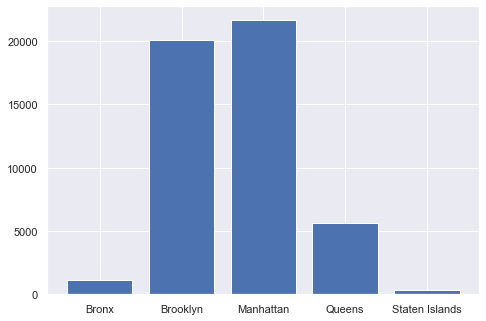

In [45]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Area = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Islands']
Houses = [1091,20104,21661,5666,373]
ax.bar(Area,Houses)
plt.show()

We can easily see that Manhattan has the most airbnb houses of 21661

<AxesSubplot:ylabel='neighbourhood_group'>

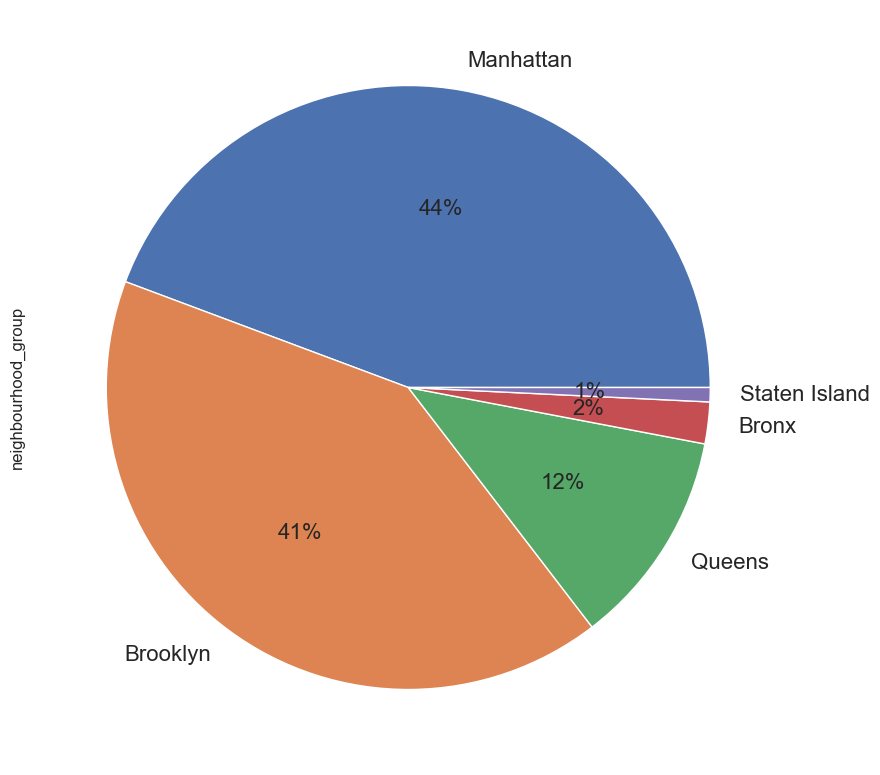

In [46]:
fig = plt.figure(figsize=(10,10), dpi=100)
dataset['neighbourhood_group'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=16)

Manhattan has the total houses of 44%, largest compare to Bronx, Queens, Brooklyn and Staten Island

# Use Binary Search Tree to sort, find and get value of price, minimum_nights, number_of_reviews, reviews_per_month and availability_365, calculated_host_listings_count

First, we implement the datas into the Binary Search Tree Data Structure. Binary Search Tree is defined as a tree data structure with nodes store a key greater than all their left child nodes and less than all of their right child nodes. 

Binary search tree algorith provide an average Big-O complexity of O(log(n)) for retrieval, insertion, update, and delete operations. Log(n) is much faster than the linear O(n) time required to find items in an unsorted array. 

Since BST is super fast in terms of data retrieval with the time complexity of O(log(n)), It is very useful for the finding and the sorting of ours dataset.



***Note:  For the implementation of the Binary Search Tree class, we must always make sure that the tree is balanced. If the tree becomes unbalanced all the fast O(log(n)) operations will quickly degrade to O(n).**

In [47]:
# Binary Search Tree class implementation
class BinarySearchTree:
    
    def __init__(self, val=None):
        """Initiate The tree with __init__"""
        self.left = None
        self.right = None
        self.val = val
    
    def insert(self, val):
        """Method for data insertion """
        if not self.val:
            self.val = val
            return

        if self.val == val:
            return
    # Make sure that the data is inserted correctly for the tree to be balanced
        if val < self.val:
            if self.left:
                self.left.insert(val)
                return
            self.left = BinarySearchTree(val)
            return

        if self.right:
            self.right.insert(val)
            return
        self.right = BinarySearchTree(val)

    def get_min(self):
        """Get minimum value stored in the tree"""
        current = self
        while current.left is not None:
            current = current.left
        return current.val

    def get_max(self):
        """Get minimum value stored in the tree"""
        current = self
        while current.right is not None:
            current = current.right
        return current.val

    def delete(self, val):
        """Delete data from the Tree"""
        if self == None:
            return self
        if val < self.val:
            if self.left:
                self.left = self.left.delete(val)
            return self
        if val > self.val:
            if self.right:
                self.right = self.right.delete(val)
            return self
        if self.right == None:
            return self.left
        if self.left == None:
            return self.right
        min_larger_node = self.right
        while min_larger_node.left:
            min_larger_node = min_larger_node.left
        self.val = min_larger_node.val
        self.right = self.right.delete(min_larger_node.val)
        return self

    def exists(self, val):
        """Check wether a specific data is already existed in a Tree. This function returns a Boolean of True or False"""
        if val == self.val:
            return True

        if val < self.val:
            if self.left == None:
                return False
            return self.left.exists(val)

        if self.right == None:
            return False
        return self.right.exists(val)

    def preorder(self, vals):
        """Print out the tree with preorder traversing"""
        if self.val is not None:
            vals.append(self.val)
        if self.left is not None:
            self.left.preorder(vals)
        if self.right is not None:
            self.right.preorder(vals)
        return vals

    def inorder(self, vals):
        """Print out the tree with inorder traversing"""
        if self.left is not None:
            self.left.inorder(vals)
        if self.val is not None:
            vals.append(self.val)
        if self.right is not None:
            self.right.inorder(vals)
        return vals

    def postorder(self, vals):
        """Print out the tree with postorder traversing"""
        if self.left is not None:
            self.left.postorder(vals)
        if self.right is not None:
            self.right.postorder(vals)
        if self.val is not None:
            vals.append(self.val)
        return vals

## Price research

In [48]:
print(len(dataset.price))

48895


In [49]:
print(dataset.price)

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64


In [50]:
# initiate the Binary Search Tree into bst_price
bst_price = BinarySearchTree()
for i in range(len(dataset.price)):
    bst_price.insert(dataset.price[i])
    

In [51]:
# Traver the tree in preorder
bst_price.inorder([])

[0,
 10,
 11,
 12,
 13,
 15,
 16,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192

The Inorder traverse of the Binary Search Tree gives us an array of price range price from lowest to highest
In order to analyse the time complexity of a tree traversal you have to think in the terms of number of nodes visited. If a tree has n nodes, then each node is visited only once in inorder traversal and hence the complexity is O(n).

In [52]:
# Get the maximum price
bst_price.get_max()

10000

In [53]:
# get the id of the max price
for i in range(len(dataset.price)):
    if dataset.price[i] == bst_price.get_max():
        print(dataset.id[i])
       

7003697
13894339
22436899


We got 3 ids of 3 Airbnb house with the largest price value. Now we will pass these ids into our 5 hash tables to search for the host names

### 7003697

In [54]:
hashtableBronx.get(7003697)

'No value can be found'

In [55]:
hashtableBrooklyn.get(7003697)

'No value can be found'

In [56]:
hashtableManhattan.get(7003697)

'No value can be found'

In [57]:
hashtableQueens.get(7003697)

'Kathrine'

In [58]:
hashtableStatenIsland.get(7003697)

'No value can be found'

Katherine, who is a host in Queens neighbourhood area, has an Airbnb house with a highest price of 10000. We can easily see that by a get() method from Hash Table with a fast time complexity of O(1). Because id is unique so that Hash Tables associated with a wrong neighbourhood group will not find any value, they will throw an error report as "No value can be found" as seen above.

### 13894339 (same as going with 7003697)

In [59]:
hashtableBronx.get(13894339)

'No value can be found'

In [60]:
hashtableBrooklyn.get(13894339)

'Erin'

Erin, who is a host in Brooklyn neighbourhood area, also has an Airbnb house with a highest price of 10000.

### 22436899

In [61]:
hashtableBronx.get(22436899)

'No value can be found'

In [62]:
hashtableBrooklyn.get(22436899)

'No value can be found'

In [63]:
hashtableManhattan.get(22436899)

'Jelena'

The last person to join the '10000 - club' is Jelena and she has a home in Manhattan

In [64]:
# get the minimum price 
bst_price.get_min()

0

In [66]:
# get the id of the min price
# store all the minimum value inside list "min"
min = []
for i in range(len(dataset.price)):
    if dataset.price[i] == bst_price.get_min():
        print(dataset.id[i])
        min.append(dataset.id[i])
print("number of min value found: ", len(min))
       

18750597
20333471
20523843
20608117
20624541
20639628
20639792
20639914
20933849
21291569
21304320
number of min value found:  11


Surprisingly for us, in this dataset the lowest price for a house rent is 0! And there are a total of 11 house for rent like that!

In [67]:
print(len(min))

11


In [ ]:
for i in min:
    print(hashtableBronx.get(i),"with id", i, "in Bronx")
print("-" * 20)    
for i in min:
    print(hashtableBrooklyn.get(i),"with id", i, "in Brooklyn")
print("-" * 20)
for i in min:
    print(hashtableManhattan.get(i), "with id", i, "in Manhanttan")
print("-" * 20)
for i in min:
    print(hashtableQueens.get(i), "with id", i, "in Queens")
print("-" * 20)
for i in min:
    print(hashtableStatenIsland.get(i), "with id", i, "in Staten Island")
    
    
    

## Conclusion of price research

Manhattan, Queens and Brooklyn are areas which has house that are for rent with the highest price (1000 Dollars)

Houses with the surpiringly low price at 0 cannot be found at Staten Island and Queens, but instead only in Manhanttan, Brooklyn and Bronx. Adeyemi is the host with the biggest number of lowest-price-house with 3 houses of id 20639628, 20639792 and 20639792 and all of them are located in Brooklyn, following Adeyemi is Sergii with 2 houses with id 21291569  and 21304320 . Brooklyn is the area with the most lowest price house (9 houses)

Brooklyn and Manhattan both has houses with the highest price and the lowest price. the price difference is huge for these two areas. They are also the area which has the most airbnb houses for rent (has already been shown above)

Surprisingly, there are house for rent with the price of 0! 

## Minimum Night research

In [68]:
# All datas from minimum_nights
print(dataset.minimum_nights)

0         1
1         1
2         3
3         1
4        10
         ..
48890     2
48891     4
48892    10
48893     1
48894     7
Name: minimum_nights, Length: 48895, dtype: int64


In [69]:
# Print all unique data in minimum_nights
print(dataset.minimum_nights.unique())

[   1    3   10   45    2    5    4   90    7   14   60   29   30  180
    9   31    6   15    8   26   28  200   50   17   21   11   25   13
   35   27   18   20   40   44   65   55  120  365  122   19  240   88
  115  150  370   16   80  181  265  300   59  185  360   56   12   70
   39   24   32 1000  110  270   22   75  250   62   23 1250  364   74
  198  100  500   43   91  480   53   99  160   47  999  186  366   68
   93   87  183  299  175   98  133  354   42   33   37  225  400  105
  184  153  134  222   58  210  275  182  114   85   36]


***Use Merge Sort Algorithm to sort minimum_nights***

In [70]:
minimum_night_list = []
for i in dataset.minimum_nights.unique():
    minimum_night_list.append(i)
print(len(minimum_night_list))    

109


In [72]:
# Initiate Merge Sort Algorithm
def mergeSort(arr):
    if len(arr) > 1:
 
         # Finding the mid of the array
        mid = len(arr)//2
 
        # Dividing the array elements
        L = arr[:mid]
 
        # into 2 halves
        R = arr[mid:]
 
        # Sorting the first half
        mergeSort(L)
 
        # Sorting the second half
        mergeSort(R)
 
        i = j = k = 0
 
        # Copy data to temp arrays L[] and R[]
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
 
        # Checking if any element was left
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
 
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

In [73]:
mergeSort(minimum_night_list)

In [74]:
print(minimum_night_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 39, 40, 42, 43, 44, 45, 47, 50, 53, 55, 56, 58, 59, 60, 62, 65, 68, 70, 74, 75, 80, 85, 87, 88, 90, 91, 93, 98, 99, 100, 105, 110, 114, 115, 120, 122, 133, 134, 150, 153, 160, 175, 180, 181, 182, 183, 184, 185, 186, 198, 200, 210, 222, 225, 240, 250, 265, 270, 275, 299, 300, 354, 360, 364, 365, 366, 370, 400, 480, 500, 999, 1000, 1250]


We can easily observer that minimum_night list has been sorted from the lowest to the highest value. Many people rent the Airbnb houses for a vary range of days

We can see that there are people who rent the Airbnb house for 1250 days!

Merge sort Algorithm analysis

Time complexity: 
* Best Case Time Complexity: O(n*log n)

* Worst Case Time Complexity: O(n*log n)

* Average Time Complexity: O(n*log n)

In [75]:
dataset['minimum_nights'].value_counts()
    
    

1      12720
2      11696
3       7999
30      3760
4       3303
       ...  
85         1
182        1
39         1
87         1
36         1
Name: minimum_nights, Length: 109, dtype: int64

Most homes are for rent for only 1 and 2 night stay because the value count for 1 and 2 is the highest with 12720 and 11696 respectively

## Finding the hosts with most houses owned with calculated_host_listings_count

In [76]:
print(dataset.calculated_host_listings_count)

0        6
1        2
2        1
3        1
4        1
        ..
48890    2
48891    2
48892    1
48893    6
48894    1
Name: calculated_host_listings_count, Length: 48895, dtype: int64


In [77]:
# Put all calculated_host_listings_counts variables into Binary Tree Data Structure to implement the Binary Tree Search Algorithm
bst_listings_count = BinarySearchTree()
for i in range(len(dataset.calculated_host_listings_count)):
    bst_listings_count.insert(dataset.calculated_host_listings_count[i])

In [78]:
# Inorder traverse of the Tree
bst_listings_count.inorder([])

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 23,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 37,
 39,
 43,
 47,
 49,
 50,
 52,
 65,
 87,
 91,
 96,
 103,
 121,
 232,
 327]

The Inorder traverse of the Binary Search Tree gives us an array of listing_counts price from lowest to highest.

In order to analyse the time complexity of a tree traversal you have to think in the terms of number of nodes visited. If a tree has n nodes, then each node is visited only once in inorder traversal and hence the complexity is O(n).


In [79]:
# Get the maximum listing_counts
bst_listings_count.get_max()

327

The most-owned-house host has 327 different houses!

In [80]:
# Find all the houses associated with this host through host id
house_list = []
for i in range(len(dataset.calculated_host_listings_count)):
    if dataset.calculated_host_listings_count[i] == bst_listings_count.get_max():
        house_list.append(dataset.id[i])
       


In [81]:
print(len(house_list))

327


In [82]:
# finding the host name and the area his/her houses are located by the get() method from Hash Table
for i in house_list:
    if hashtableBronx.get(i) != "No value can be found":
        print(hashtableBronx.get(i),"with id", i, "in Bronx")
print("-" * 20)    
for i in house_list:
    if hashtableBrooklyn.get(i) != "No value can be found":
        print(hashtableBrooklyn.get(i),"with id", i, "in Brooklyn")
print("-" * 20)
for i in house_list:
    if hashtableManhattan.get(i) != "No value can be found":
        print(hashtableManhattan.get(i), "with id", i, "in Manhanttan")
print("-" * 20)
for i in house_list:
    if hashtableQueens.get(i) != "No value can be found":
        print(hashtableQueens.get(i), "with id", i, "in Queens")
print("-" * 20)
for i in house_list:
    if hashtableStatenIsland.get(i) != "No value can be found":
        print(hashtableStatenIsland.get(i), "with id", i, "in Staten Island")

--------------------
--------------------
Sonder (NYC) with id 30181691 in Manhanttan
Sonder (NYC) with id 30181945 in Manhanttan
Sonder (NYC) with id 30347708 in Manhanttan
Sonder (NYC) with id 30937590 in Manhanttan
Sonder (NYC) with id 30937591 in Manhanttan
Sonder (NYC) with id 30937594 in Manhanttan
Sonder (NYC) with id 30937595 in Manhanttan
Sonder (NYC) with id 30937596 in Manhanttan
Sonder (NYC) with id 30937597 in Manhanttan
Sonder (NYC) with id 30937598 in Manhanttan
Sonder (NYC) with id 30937740 in Manhanttan
Sonder (NYC) with id 30937747 in Manhanttan
Sonder (NYC) with id 30937750 in Manhanttan
Sonder (NYC) with id 30937756 in Manhanttan
Sonder (NYC) with id 30937759 in Manhanttan
Sonder (NYC) with id 30937762 in Manhanttan
Sonder (NYC) with id 30937764 in Manhanttan
Sonder (NYC) with id 31378549 in Manhanttan
Sonder (NYC) with id 32218558 in Manhanttan
Sonder (NYC) with id 32218659 in Manhanttan
Sonder (NYC) with id 32218803 in Manhanttan
Sonder (NYC) with id 32219550 in M

Time complexity already explained for the Hash Table get() algorithm above

****Sonder (NYC) is the most houses owned host we are looking for and all of her houses are located in only Manhanttan as the result you can see above****

### Finding the second most houses owned host

We can see from the inorder traverse algorithm of the Binary Tree, the second largest number is 232

Which mean the most houses owned busiest host has 232 different houses

In [83]:
# Find all the houses associated with this second host through host id
house_list_2 = []
for i in range(len(dataset.calculated_host_listings_count)):
    if dataset.calculated_host_listings_count[i] == 232:
        house_list_2.append(dataset.id[i])
       


In [84]:
print(len(house_list_2))

232


In [ ]:
# finding the host name and the area his/her houses are located by the get() method from Hash Table
for i in house_list_2:
    if hashtableBronx.get(i) != "No value can be found":
        print(hashtableBronx.get(i),"with id", i, "in Bronx")
print("-" * 20)    
for i in house_list_2:
    if hashtableBrooklyn.get(i) != "No value can be found":
        print(hashtableBrooklyn.get(i),"with id", i, "in Brooklyn")
print("-" * 20)
for i in house_list_2:
    if hashtableManhattan.get(i) != "No value can be found":
        print(hashtableManhattan.get(i), "with id", i, "in Manhanttan")
print("-" * 20)
for i in house_list_2:
    if hashtableQueens.get(i) != "No value can be found":
        print(hashtableQueens.get(i), "with id", i, "in Queens")
print("-" * 20)
for i in house_list_2:
    if hashtableStatenIsland.get(i) != "No value can be found":
        print(hashtableStatenIsland.get(i), "with id", i, "in Staten Island")

****Blueground is the second host we are looking for, most of Blueground's houses are in Manhanttan just like Sonder (NYC). But unlike Sonder, he/she has  houses from other area, which is Brooklyn  ****

## Finding the busiest hosts with availability_365

In [85]:
print(dataset.availability_365)

0        365
1        355
2        365
3        194
4          0
        ... 
48890      9
48891     36
48892     27
48893      2
48894     23
Name: availability_365, Length: 48895, dtype: int64


In [86]:
# Put all availability_365 variables into Binary Tree Data Structure to implement the Binary Tree Search Algorithm
bst_availability_365 = BinarySearchTree()
for i in range(len(dataset.availability_365)):
    bst_availability_365.insert(dataset.availability_365[i])

In [87]:
# Get the maximum availability_365
bst_availability_365.get_max()

365

The busiest hosts are the hosts with rooms that listing is always available for booking in a year as the get_max() return the value of 365

In [88]:
# Find all the houses associated with this busiest hostthrough host id
availability_list = []
for i in range(len(dataset.availability_365)):
    if dataset.availability_365[i] == bst_availability_365.get_max():
        availability_list.append(dataset.id[i])
       

In [89]:
print(len(availability_list))

1295


In [90]:
# finding the host names and the area there houses are located by the get() method from Hash Table
for i in availability_list:
    if hashtableBronx.get(i) != "No value can be found":
        print(hashtableBronx.get(i),"with id", i, "in Bronx")
print("-" * 20)    
for i in availability_list:
    if hashtableBrooklyn.get(i) != "No value can be found":
        print(hashtableBrooklyn.get(i),"with id", i, "in Brooklyn")
print("-" * 20)
for i in availability_list:
    if hashtableManhattan.get(i) != "No value can be found":
        print(hashtableManhattan.get(i), "with id", i, "in Manhanttan")
print("-" * 20)
for i in availability_list:
    if hashtableQueens.get(i) != "No value can be found":
        print(hashtableQueens.get(i), "with id", i, "in Queens")
print("-" * 20)
for i in availability_list:
    if hashtableStatenIsland.get(i) != "No value can be found":
        print(hashtableStatenIsland.get(i), "with id", i, "in Staten Island")

 in Manhanttan
Kara with id 15229456 in Manhanttan
Bluebird with id 15229619 in Manhanttan
Bluebird with id 15230339 in Manhanttan
Bluebird with id 15230576 in Manhanttan
Henry with id 15314054 in Manhanttan
Wynpoints with id 15325255 in Manhanttan
Daniel with id 15327553 in Manhanttan
Henry with id 15347268 in Manhanttan
Bluebird with id 15496314 in Manhanttan
Bluebird with id 15496616 in Manhanttan
Bluebird with id 15497088 in Manhanttan
Bluebird with id 15497229 in Manhanttan
Bluebird with id 15497406 in Manhanttan
Bluebird with id 15497673 in Manhanttan
Bluebird with id 15497821 in Manhanttan
Bluebird with id 15505535 in Manhanttan
Grand with id 15507436 in Manhanttan
Wynpoints with id 15735305 in Manhanttan
Moustafa with id 15756248 in Manhanttan
Ken with id 15767882 in Manhanttan
Kara with id 15769964 in Manhanttan
Phenix with id 15772067 in Manhanttan
Golden&Mavy with id 15832098 in Manhanttan
Alyssa with id 15857334 in Manhanttan
Francis with id 15858680 in Manhanttan
Umut&Deni

These are the list of busiest hosts in different areas determined by the number of days when listing is available for booking. The highest number of days when listing is available for booking is 365

## Number of reviews research

In [91]:
dataset['number_of_reviews'].value_counts()

0      10052
1       5244
2       3465
3       2520
4       1994
       ...  
326        1
439        1
594        1
335        1
607        1
Name: number_of_reviews, Length: 394, dtype: int64

There are around 10000 of airbnb houses that don't receive any reviews users

There is one Airbnb house that receive the most number of 607 reviews

In [92]:
dataset[dataset['number_of_reviews'] == 607]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,2019-06-21,7.75,3,293


"Great Bedroom in Manhattan" in Manhattan owned by Ji has the most reviews. It has a private room type with the price of 49 Dollars per night